# A Simple Scikit-Learn Classification Workflow

This notebook shows a breif workflow you might use with `scikit-learn` to build a machine learning model to classify whether or not a patient has heart disease.

It follows the diagram below:

<img src="images/sklearn-workflow.png"/>

**Note:** This workflow assumes your data is ready to be used with machine learning models (is numerical, has no missing values).

In [30]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Get the data ready

In [14]:
# Import dataset
heart_disease = pd.read_csv("data/heart-disease.csv")

# View the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

(14.5, -0.5)

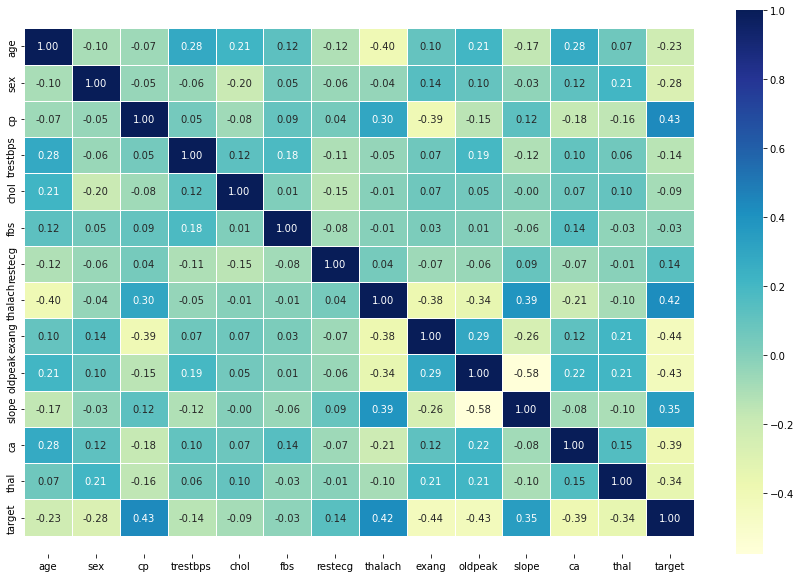

In [31]:
# Make a correlation matrix
heart_disease.corr()
# Let's make our correlation matrix a little prettier
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:>

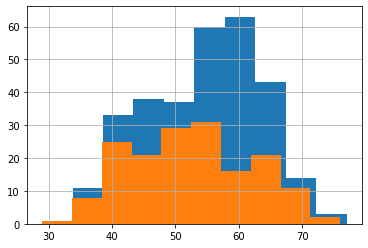

In [24]:
heart_disease.age.hist()
heart_disease.age[heart_disease.target==1].hist()

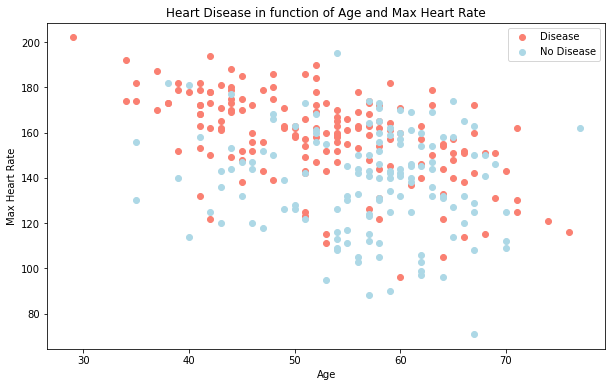

In [26]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.thalach[heart_disease.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

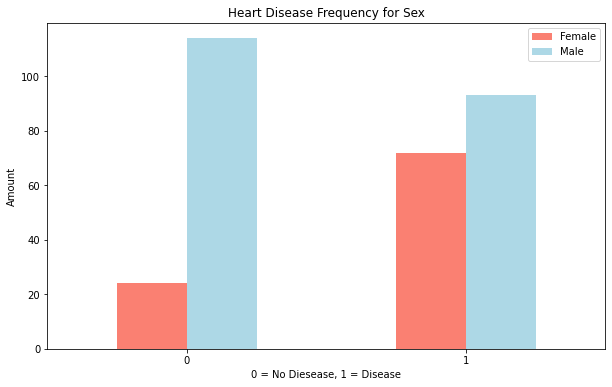

In [21]:
pd.crosstab(heart_disease.sex, heart_disease.target)

# Create a plot of crosstab
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar",
                                                          figsize=(10, 6),
                                                          color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

With this example, we're going to use all of the columns except the target column to predict the targert column.

In other words, using a patient's medical and demographic data to predict whether or not they have heart disease.

In [32]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

In [33]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# View the data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

## 2. Choose the model/estimator

You can do this using the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

<img src="images/sklearn-ml-map.png" width=500/>

In Scikit-Learn, machine learning models are referred to as estimators.

In this case, since we're working on a classification problem, we've chosen the RandomForestClassifier estimator which is part of the ensembles module.

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the data and use it to make a prediction

A model will (attempt to) learn the patterns in a dataset by calling the `fit()` function on it and passing it the data.

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier()

Once a model has learned patterns in data, you can use them to make a prediction with the `predict()` function.

In [36]:
# Make predictions
y_preds = model.predict(X_test) # This will be in the same format as y_test

# Predict with probabilities (on classification models)
y_probs = model.predict_proba(X_test)

## 4. Evaluate the model
A trained model/estimator can be evaluated by calling the `score()` function and passing it a collection of data.

In [37]:
# On the training set
print(model.score(X_train, y_train))

# On the test set (unseen)
print(model.score(X_test, y_test))

1.0
0.8157894736842105


### cross_val_score
<img src= "images/sklearn-cross-validation.png" width=600/>

In [38]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(model, X, y, cv=5)
cv_acc

array([0.83606557, 0.8852459 , 0.78688525, 0.8       , 0.8       ])

0.8157894736842105
0.8165266106442577
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        34
           1       0.85      0.81      0.83        42

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.82      0.82      0.82        76

[[28  6]
 [ 8 34]]


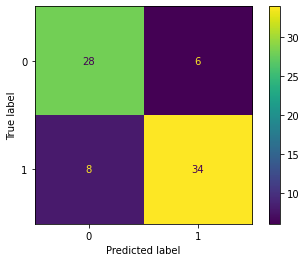

In [39]:
# Different classification metrics

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))

# Reciver Operating Characteristic (ROC curve)/Area under curve (AUC)
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:, 1])
print(roc_auc_score(y_test, y_preds))

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

# Plot confusion matrix from predictions
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

### Feature Importance

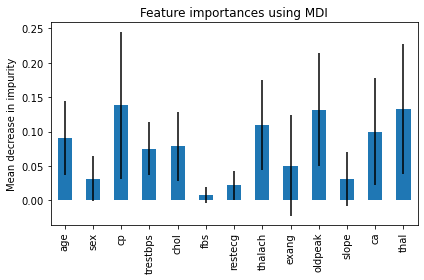

In [49]:
#Feature importance based on mean decrease in impurity
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

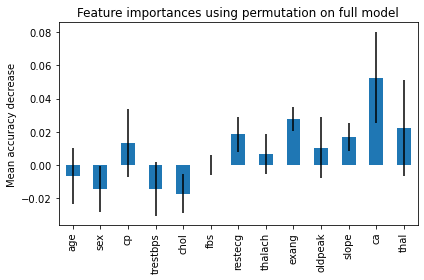

In [51]:
#Feature importance based on feature permutation
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## 5. Experiment to improve (hyperparameter tuning)

A model's first evaluation metrics aren't always its last. One way to improve a models predictions is with hyperparameter tuning.

**Note:** It's best practice to test different hyperparameters with a validation set or cross-validation.

In [ ]:
# Try different numbers of estimators with cross-validation and no cross-validation
np.random.seed(42)
for i in range(10, 50, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {model.score(X_test, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

In [ ]:
#baseline model
model = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
# Make predictions
y_preds = model.predict(X_test)

In [ ]:
# Example of adjusting hyperparameters computationally (recommended)
from sklearn.model_selection import RandomizedSearchCV

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=5, # try 10 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

# Find the best hyperparameters
print(rs_clf.best_params_)

# Evaluate RandomizedSearchCV model
rs_y_preds = rs_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

# Find best parameters of GridSearchCV
gs_clf.best_params_

# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Save a model for later use

A trained model can be exported and saved so it can be imported and used later. One way to save a model is using Python's `pickle` module.

In [ ]:
import pickle

# Save trained model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [ ]:
# Load a saved model and make a prediction on a single example
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test, y_test)

We can do the same with `joblib`
`joblib` is usually more efficient with numerical data (what our models are).

In [ ]:
# Saving a model with joblib
from joblib import dump, load

# Save a model to file
dump(rs_clf, filename="rs_random_forest_model_1.joblib") 

In [ ]:
# Import a saved joblib model
loaded_joblib_model = load(filename="rs_random_forest_model_1.joblib")
# Evaluate joblib predictions 
loaded_joblib_model.score(X_test, y_test)